# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [4]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [5]:
import pandas as pd

df = pd.read_csv('sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
import numpy as np

df_numpy = df.values
X = df_numpy[:, :60]
y = df_numpy[:, 60:61]

In [7]:
np.unique(y)

array(['M', 'R'], dtype=object)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.1)

In [66]:
from tensorflow.keras.optimizers import Adam

# Definir el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(512, input_dim=60, activation='relu'))

# Bloque densamente conectado 1
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Bloque densamente conectado 2
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Capa de salida
model.add(Dense(2, activation='sigmoid'))

# Definir el optimizador con LR personalizado
custom_optimizer = Adam(lr=0.001)  # Puedes ajustar el LR según lo necesites

# Compilar el modelo con el optimizador personalizado
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 512)               31232     
                                                                 
 dense_145 (Dense)           (None, 256)               131328    
                                                                 
 dense_146 (Dense)           (None, 256)               65792     
                                                                 
 batch_normalization_48 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_147 (Dense)           (None, 128)               32896     
                                                                 
 dense_148 (Dense)           (None, 128)               16512     
                                                     

In [67]:
history = model.fit(X_train, y_train, epochs=20, batch_size=42,
                    validation_data=(X_val, y_val))

Epoch 1/20
5/5 [==============================] - 5s 100ms/step - loss: 0.6634 - accuracy: 0.6828 - val_loss: 0.6524 - val_accuracy: 0.8095
Epoch 2/20
5/5 [==============================] - 0s 39ms/step - loss: 0.2416 - accuracy: 0.9624 - val_loss: 0.6271 - val_accuracy: 0.7619
Epoch 3/20
5/5 [==============================] - 0s 40ms/step - loss: 0.1293 - accuracy: 0.9946 - val_loss: 0.6041 - val_accuracy: 0.7619
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0797 - accuracy: 0.9892 - val_loss: 0.5860 - val_accuracy: 0.8095
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.5735 - val_accuracy: 0.8571
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.5569 - val_accuracy: 0.8571
Epoch 7/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.5396 - val_accuracy: 0.8571
Epoch 8/20
5/5 [==========

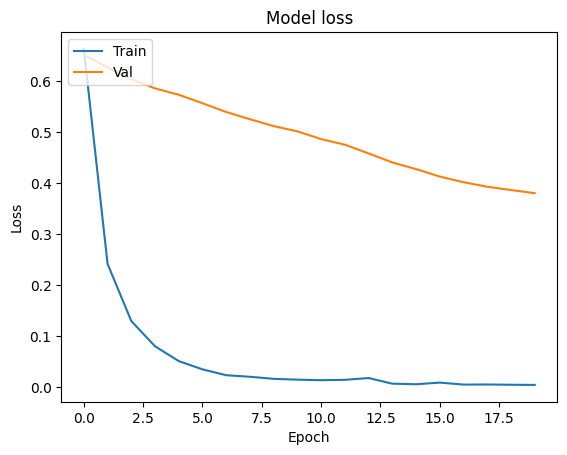

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

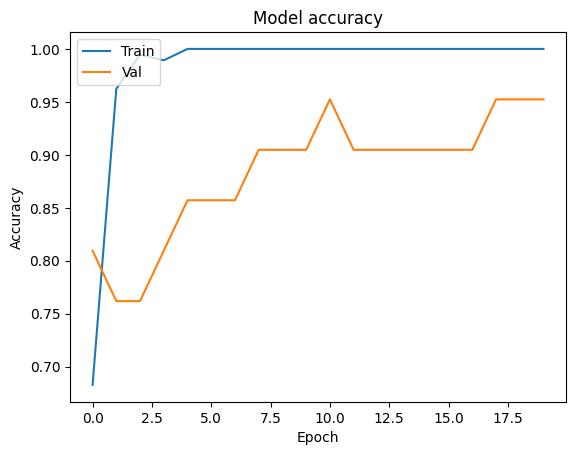

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()